In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('data_science_job.csv')

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [8]:
df.isnull().mean()*100 #gives percentage of null values

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [16]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]

In [17]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [18]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
733,0.624,no_enrollment,High School,4.0,28.0
9172,0.624,no_enrollment,Graduate,2.0,24.0
4340,0.926,Full time course,Graduate,6.0,16.0
9276,0.795,no_enrollment,Graduate,4.0,8.0
3197,0.920,Full time course,Graduate,4.0,28.0


In [19]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [20]:
df_drop=df[cols].dropna()

array([[<AxesSubplot:title={'center':'city_development_index'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'training_hours'}>, <AxesSubplot:>]],
      dtype=object)

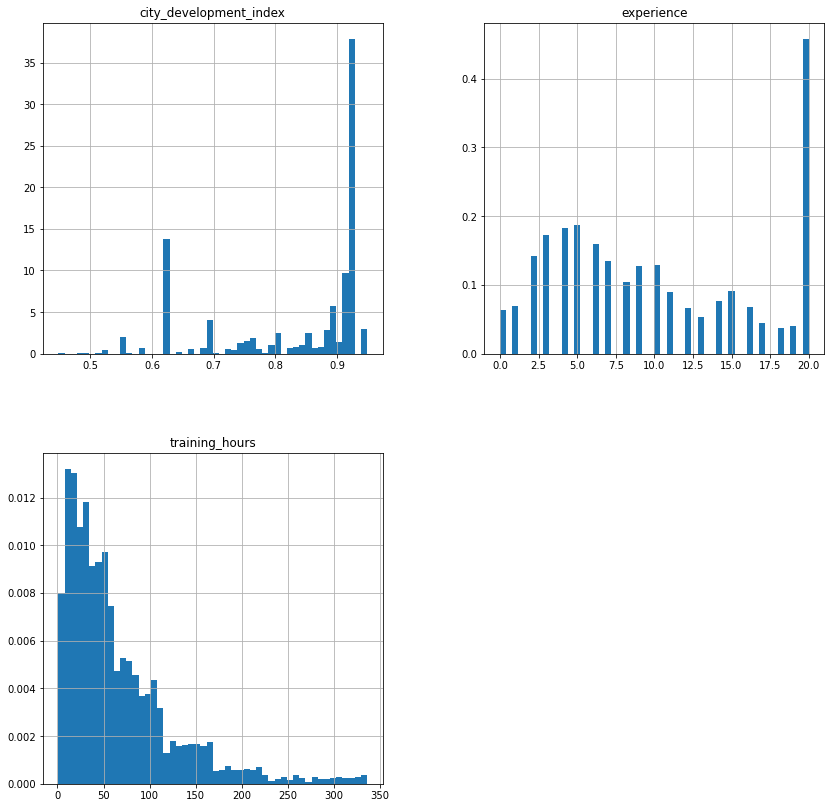

In [27]:
df_drop.hist(bins=50,density=True,figsize=(14,14))

<AxesSubplot:>

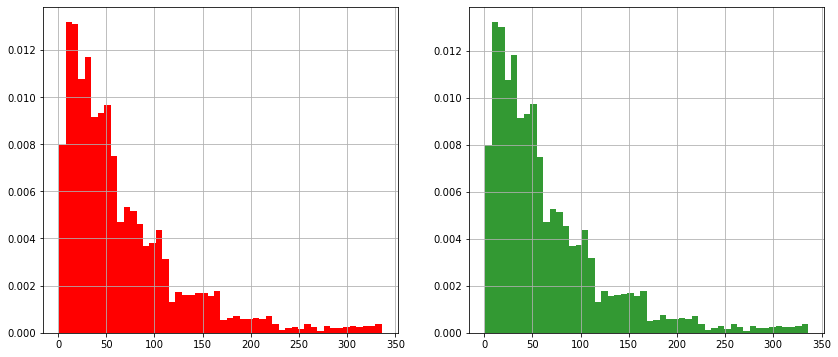

In [42]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(14,6))
plt.subplot(121)
df['training_hours'].hist(bins=50,density=True, color='red')
plt.subplot(122)
# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_drop['training_hours'].hist(bins=50, color='green', density=True, alpha=0.8)

<AxesSubplot:>

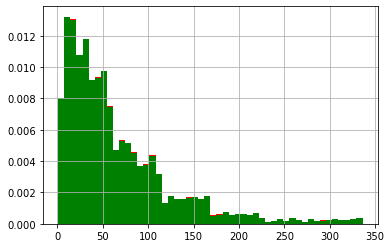

In [44]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_drop['training_hours'].hist(bins=50, ax=ax, color='green', density=True)

<AxesSubplot:ylabel='Density'>

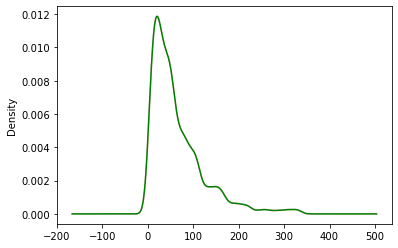

In [47]:
fig=plt.figure()
ax=fig.add_subplot()
# original data
df['training_hours'].plot.density(color='pink')

# data after cca
df_drop['training_hours'].plot.density(color='green')

<AxesSubplot:>

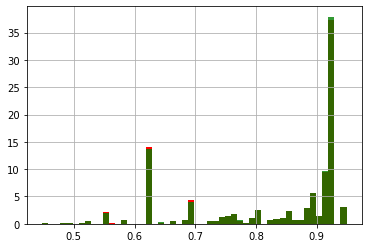

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
df_drop['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

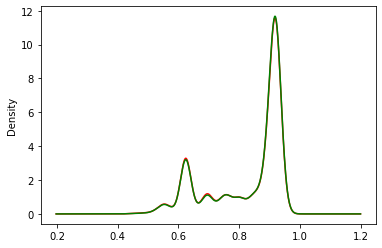

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
df_drop['city_development_index'].plot.density(color='green')

## CATEGORICAL_VARIABLES MUST HAVE THE SAME RATIO

In [55]:
temp=pd.concat([
    df['enrolled_university'].value_counts()/len(df),
    df_drop['enrolled_university'].value_counts()/len(df_drop)
],axis=1)
temp.columns=['orginal','cca']
temp

,orginal,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [58]:
temp=pd.concat([
    df['education_level'].value_counts()/len(df),
    df_drop['education_level'].value_counts()/len(df_drop)
],axis=1)
temp.columns=['orginal','cca']
temp

,orginal,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
